In [40]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []


# Initial parameters
L_0 =200 # Fixed Markov chain length


# Define the two-variable function
def f(x, y):
    return (x - 3)**2 + (y + 2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)

    data_dimensions = 3
    simulation_data = np.empty((500, L_0, data_dimensions))

    L_i = L_0

    for i in range(1, 501):

        trails = 1
        while trails < L_i:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
            delta_E = f(new_x, new_y) - f(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y

                simulation_data[i, trails - 1, 0] = temp
                simulation_data[i, trails - 1, 1] = trails
                simulation_data[i, trails - 1, 2] = f(current_x, current_y)

            trails += 1

            best_solution = (current_x, current_y)
            best_value = f(current_x, current_y)


        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        delta_T = temp * 0.05
        temp -= delta_T

        # L = 5
        # delta_T = temp*0.05 # Decrement Value
        # if i % L == 0:
        #     temp = temp - delta_T

    return best_solution, best_value, states, function_values, temperatures, iterations,simulation_data

In [41]:
best_solution, best_value, states, function_values,temperatures,iterations,simulation_data= simulate(1500)

In [16]:
# import numpy as np
# import random
# import math
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Arrays for storing temperatures, function values, iterations, and states
# temperatures = []
# function_values = []
# iterations = []
# states = []

# # Initial parameters
# L_0 = 300  # Fixed Markov chain length

# # Define the two-variable function
# def f(x, y):
#     return (x - 3)**2 + (y + 2)**2 + 5

# def simulate(temp):
#     current_x = random.uniform(-3, 4)
#     current_y = random.uniform(-3, 4)
#     best_solution = (current_x, current_y)
#     best_value = f(current_x, current_y)

#     data_dimensions = 3
#     simulation_data = np.empty((500, L_0, data_dimensions))

#     L_i = L_0

#     for i in range(1, 501):
#         trails = 1
#         while trails < L_i:
#             new_x = random.uniform(-3, 4)
#             new_y = random.uniform(-3, 4)
#             delta_E = f(new_x, new_y) - f(current_x, current_y)

#             if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
#                 current_x = new_x
#                 current_y = new_y

#                 simulation_data[i-1, trails - 1, 0] = temp
#                 simulation_data[i-1, trails - 1, 1] = trails
#                 simulation_data[i-1, trails - 1, 2] = f(current_x, current_y)

#                 best_solution = (current_x, current_y)
#                 best_value = f(current_x, current_y)

#             trails += 1

#         states.append(best_solution)
#         function_values.append(best_value)
#         temperatures.append(temp)
#         iterations.append(i)

#         # Decrease the temperature
#         L = 5
#         delta_T = temp * 0.05  # Decrement Value
#         if i % L == 0:
#             temp -= delta_T

#     return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data

# # Run the simulation
# best_solution, best_value, states, function_values, temperatures, iterations, simulation_data = simulate(1500)

In [42]:
print(f"solution: {best_solution} \n function_value: {best_value}")

solution: (2.9991582175834424, -1.996379376702869) 
 function_value: 5.0000138175106965


In [43]:
target_temp = 5
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))

In [44]:
function_values_for_temp = simulation_data[closest_iteration, :, 2]

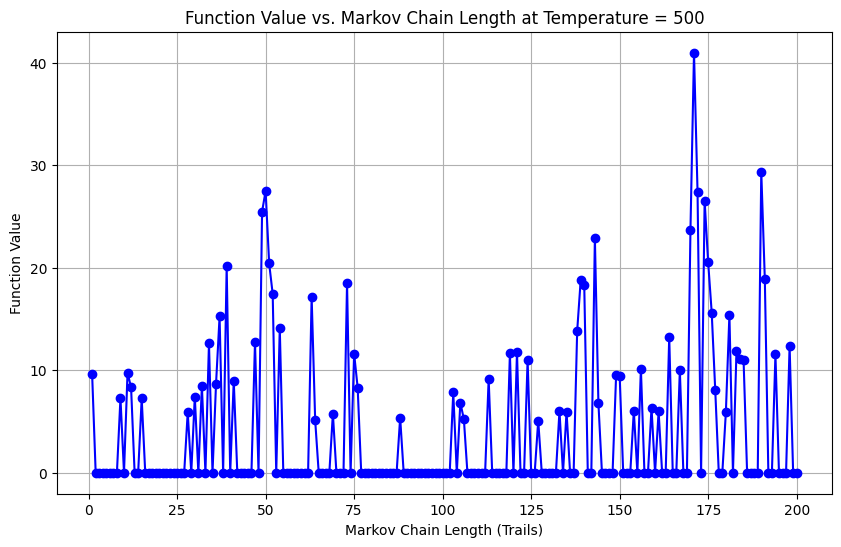

In [45]:
# Plot the function values vs. Markov chain length (1 to 50 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title('Function Value vs. Markov Chain Length at Temperature = 500')
plt.grid(True)
plt.show()

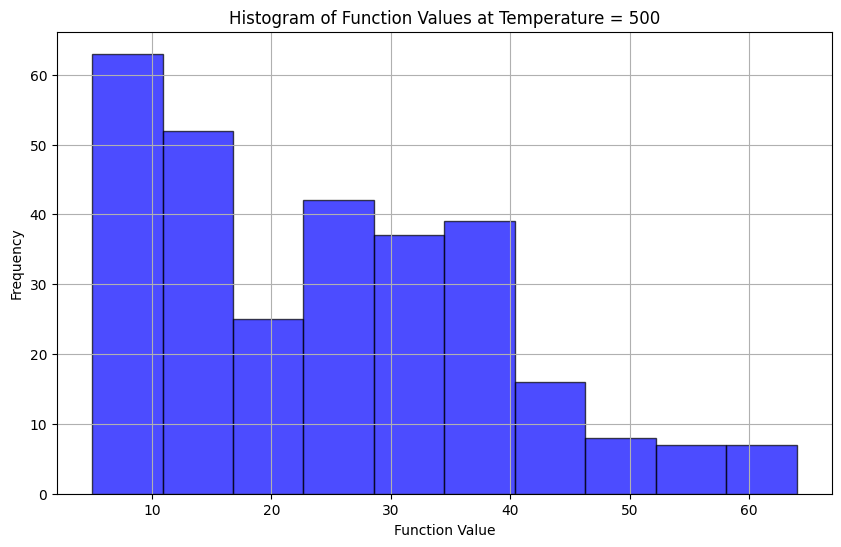

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(function_values_for_temp, bins=10, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Function Value')
plt.ylabel('Frequency')
plt.title('Histogram of Function Values at Temperature = 500')
plt.grid(True)
plt.show()

In [ ]:
# unction_values_for_temp